In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from pathlib import Path
from statistics import mean
import matplotlib.pyplot as plt

In [5]:
# ------------------------------- setting start ------------------------------ #
# color
color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
errorbar_color = "#3A3A3A"

# font
csfont = {'family':'Times New Roman', 'serif': 'Times' , 'size' : 23}
plt.rc('text', usetex=True)
plt.rc('font', **csfont)

# bar plot size
bar_width = 0.4
bar_btw_space = 0.04
bar_space = 0.2

# errorbar plot size
err_lw=1.5
err_capsize=4
err_capthick=1.5

# set fig size
figsize=(6.4, 4.8)
# -------------------------------- setting end ------------------------------- #

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
Failed to find a Ghostscript installation.  Distillation step skipped.


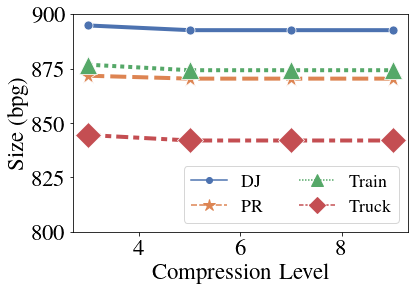

    cl_value scene_name  encode_size
0          3         DJ   894.899858
1          3         PR   871.781622
2          3      Train   876.861375
3          3      Truck   844.520451
4          5         DJ   892.733198
5          5         PR   870.444448
6          5      Train   874.318782
7          5      Truck   841.994099
8          7         DJ   892.733198
9          7         PR   870.444448
10         7      Train   874.318782
11         7      Truck   841.994099
12         9         DJ   892.733198
13         9         PR   870.444448
14         9      Train   874.318782
15         9      Truck   841.994099


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
Failed to find a Ghostscript installation.  Distillation step skipped.


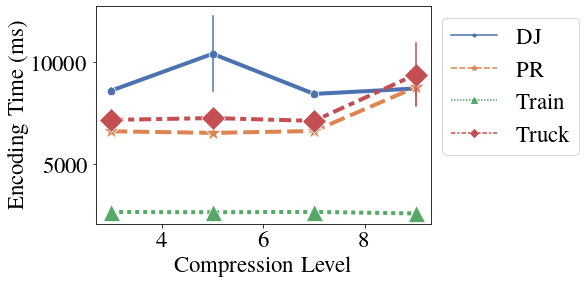

    cl_value scene_name  encode_time
0          3         DJ       8587.8
1          3         PR       6594.2
2          3      Train       2640.2
3          3      Truck       7153.6
4          5         DJ      10393.0
5          5         PR       6517.6
6          5      Train       2628.8
7          5      Truck       7243.8
8          7         DJ       8426.4
9          7         PR       6609.2
10         7      Train       2644.0
11         7      Truck       7105.0
12         9         DJ       8692.4
13         9         PR       8752.8
14         9      Train       2569.6
15         9      Truck       9373.8


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
Failed to find a Ghostscript installation.  Distillation step skipped.


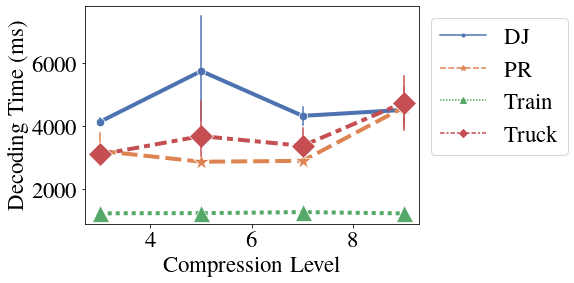

    cl_value scene_name  decode_time
0          3         DJ       4138.8
1          3         PR       3219.0
2          3      Train       1239.8
3          3      Truck       3105.6
4          5         DJ       5753.2
5          5         PR       2875.6
6          5      Train       1245.2
7          5      Truck       3689.4
8          7         DJ       4331.6
9          7         PR       2903.4
10         7      Train       1278.0
11         7      Truck       3380.6
12         9         DJ       4521.4
13         9         PR       4605.8
14         9      Train       1237.2
15         9      Truck       4754.8


In [6]:
def compression_level_scene_plot():
    roundNum = 0
    
    saveDir = Path(".")/"figs"/f"round{roundNum}"
    saveDir.mkdir(parents=True, exist_ok=True)
    
    filePath = Path(".")/"csv_all"/f"round{roundNum}"/"compression_level.csv"
    df = pd.read_csv(filePath)
    
    # Step 1: change to plotting format and filter
    df_plot = df
    df_plot['encode_size'] = df_plot['encode_size'] * 8 / df_plot['numOf3DGS']
    df_plot['alg'] = df_plot['alg'].replace(['draco'], 'DRACO')
    
    df_plot['scene_name'] = df_plot['scene_name'].replace(['drjohnson'], 'DJ')
    df_plot['scene_name'] = df_plot['scene_name'].replace(['playroom'], 'PR')
    df_plot['scene_name'] = df_plot['scene_name'].replace(['train'], 'Train')
    df_plot['scene_name'] = df_plot['scene_name'].replace(['truck'], 'Truck')
    
    # Step 2: plot
    # Size
    ax = sns.lineplot(x='cl_value', y='encode_size',
                    hue= "scene_name",
                    style="scene_name", 
                    data=df_plot, 
                    errorbar=('ci', 95), err_style="bars",
                    palette = 'deep',
                    markers=[".","*","^","D"],
                    markersize=18,
                    lw=4
                    )
    
    ax.set(xlabel='Compression Level', ylabel='Size (bpg)')
    ax.set(ylim = (800, 900))
    # ax.set_yticks([30, 40, 50, 60])
    plt.legend(title='', loc='lower right', fontsize="18", ncol=2, markerscale=2)
    plt.savefig(f'{saveDir}/compression_size_scene.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'{saveDir}/compression_size_scene.eps', dpi=300, bbox_inches='tight')
    plt.show()

    average_y_per_x = df_plot.groupby(['cl_value', 'scene_name'])['encode_size'].mean().reset_index()
    print(average_y_per_x)

    # Encode time
    ax = sns.lineplot(x='cl_value', y='encode_time', 
                    hue= "scene_name",
                    style="scene_name", 
                    data=df_plot, 
                    errorbar=('ci', 95), err_style="bars",
                    palette = 'deep',
                    markers=[".","*","^","D"],
                    markersize=17,
                    lw=4
                    )
    
    ax.set(xlabel='Compression Level', ylabel='Encoding Time (ms)')
    plt.legend(title='', loc='upper right')
    # plt.legend(title='', loc='lower right', labels=['DC', 'MG'])
    # plt.legend(title='', loc='lower right', labels=['DO', 'DC', 'MG'])
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.savefig(f'{saveDir}/compression_encode_scene.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'{saveDir}/compression_encode_scene.eps', dpi=300, bbox_inches='tight')
    plt.show()

    average_y_per_x = df_plot.groupby(['cl_value', 'scene_name'])['encode_time'].mean().reset_index()
    print(average_y_per_x)

    # decode time
    ax = sns.lineplot(x='cl_value', y='decode_time',
                    hue= "scene_name",
                    style="scene_name", 
                    data=df_plot, 
                    errorbar=('ci', 95), err_style="bars",
                    palette = 'deep',
                    markers=[".","*","^","D"],
                    markersize=17,
                    lw=4
                    )
    
    ax.set(xlabel='Compression Level', ylabel='Decoding Time (ms)')
    plt.legend(title='', loc='lower right')
    # plt.legend(title='', loc='lower right', labels=['DC', 'MG'])
    # plt.legend(title='', loc='lower right', labels=['DO', 'DC', 'MG'])
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.savefig(f'{saveDir}/compression_decode_scene.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'{saveDir}/compression_decode_scene.eps', dpi=300, bbox_inches='tight')
    plt.show()

    average_y_per_x = df_plot.groupby(['cl_value', 'scene_name'])['decode_time'].mean().reset_index()
    print(average_y_per_x)

compression_level_scene_plot() 

<ipython-input-7-b17bc5c7cfcf>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['scene_name'] = df_plot['scene_name'].replace(['lego'], 'Lego')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
Failed to find a Ghostscript installation.  Distillation step skipped.


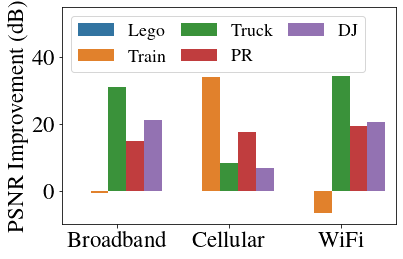

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
Failed to find a Ghostscript installation.  Distillation step skipped.


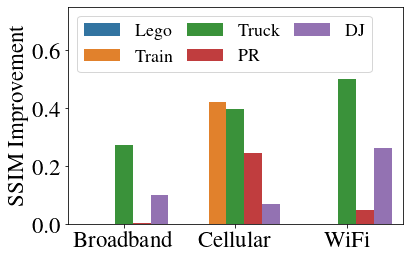

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
Failed to find a Ghostscript installation.  Distillation step skipped.


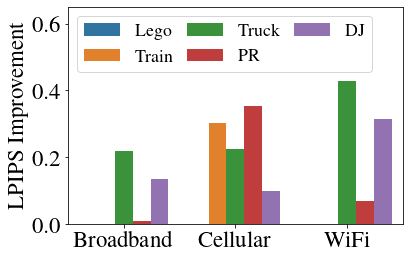

In [7]:
def improvement():
    roundNum = 0
    
    saveDir = Path(".")/"figs"/f"round{roundNum}"
    saveDir.mkdir(parents=True, exist_ok=True)
    
    df_all = pd.DataFrame()
    
    filePath = Path(".")/"csv_all"/f"round{roundNum}"/"all.csv"
    df = pd.read_csv(filePath)
    
    # Step 1: change to plotting format and filter
    df_plot = df
    df_plot = df_plot[df_plot["network"] == "broadband"]    
    for scene_name in df_plot["scene_name"].unique():
        opt_df = df_plot.loc[(df_plot["scene_name"] == scene_name) & (df_plot["type"] == "opt")].copy()
        gpcc_df = df_plot.loc[(df_plot["scene_name"] == scene_name) & (df_plot["type"] == "gpcc")].copy()
        
        tmp_psnr = opt_df["psnr"].iloc[0] - gpcc_df["psnr"].iloc[0]
        tmp_ssim = opt_df["ssim"].iloc[0] - gpcc_df["ssim"].iloc[0]
        tmp_lpips = gpcc_df["lpips"].iloc[0] - opt_df["lpips"].iloc[0]
        
        gpcc_df["psnr_diff"] = tmp_psnr
        gpcc_df["ssim_diff"] = tmp_ssim
        gpcc_df["lpips_diff"] = tmp_lpips
        
        df_all = df_all.append(gpcc_df)
    
    df_plot = df
    df_plot = df_plot[df_plot["network"] == "celullar"]
    for scene_name in df_plot["scene_name"].unique():
        opt_df = df_plot.loc[(df_plot["scene_name"] == scene_name) & (df_plot["type"] == "opt")].copy()
        gpcc_df = df_plot.loc[(df_plot["scene_name"] == scene_name) & (df_plot["type"] == "gpcc")].copy()
        
        tmp_psnr = opt_df["psnr"].iloc[0] - gpcc_df["psnr"].iloc[0]
        tmp_ssim = opt_df["ssim"].iloc[0] - gpcc_df["ssim"].iloc[0]
        tmp_lpips = gpcc_df["lpips"].iloc[0] - opt_df["lpips"].iloc[0]
        
        gpcc_df["psnr_diff"] = tmp_psnr
        gpcc_df["ssim_diff"] = tmp_ssim
        gpcc_df["lpips_diff"] = tmp_lpips
        
        df_all = df_all.append(gpcc_df)
    
    df_plot = df
    df_plot = df_plot[df_plot["network"] == "wifi"]
    for scene_name in df_plot["scene_name"].unique():
        opt_df = df_plot.loc[(df_plot["scene_name"] == scene_name) & (df_plot["type"] == "opt")].copy()
        gpcc_df = df_plot.loc[(df_plot["scene_name"] == scene_name) & (df_plot["type"] == "gpcc")].copy()
        
        tmp_psnr = opt_df["psnr"].iloc[0] - gpcc_df["psnr"].iloc[0]
        tmp_ssim = opt_df["ssim"].iloc[0] - gpcc_df["ssim"].iloc[0]
        tmp_lpips = gpcc_df["lpips"].iloc[0] - opt_df["lpips"].iloc[0]
        
        gpcc_df["psnr_diff"] = tmp_psnr
        gpcc_df["ssim_diff"] = tmp_ssim
        gpcc_df["lpips_diff"] = tmp_lpips
        
        df_all = df_all.append(gpcc_df)
    
    
    df_all['size_mean'] = df_all['size_mean'] * 8 / 1000000
    
    df_all['scene_name'] = df_all['scene_name'].replace(['drjohnson'], 'DJ')
    df_all['scene_name'] = df_all['scene_name'].replace(['playroom'], 'PR')
    df_all['scene_name'] = df_all['scene_name'].replace(['train'], 'Train')
    df_all['scene_name'] = df_all['scene_name'].replace(['truck'], 'Truck')
    df_plot['scene_name'] = df_plot['scene_name'].replace(['lego'], 'Lego')
    hue_order=["Lego", "Train", "Truck", "PR", "DJ"]
    
    df_all['network'] = df_all['network'].replace(['broadband'], 'Broadband')
    df_all['network'] = df_all['network'].replace(['celullar'], 'Cellular')
    df_all['network'] = df_all['network'].replace(['wifi'], 'WiFi')
    
    # Step 2: plot
    # label = []
    # for network in ["Broadband", "Cellular", "WiFi"]:
    #     for scene_name in ["DJ", "PR", "Train", "Truck"]:
    #         label.append((df_all.loc[(df_all["network"] == network) & (df_all["scene_name"] == scene_name)])["psnr"].iloc[0])
    # print(label)
    # ax.bar_label(ax.containers[0], label)
    
    # PSNR
    ax = sns.barplot(x='network', y='psnr_diff',
                    hue= "scene_name", hue_order=hue_order,
                    data=df_all, 
                    errorbar=('ci', 95)
                    )
    
        
    ax.set(xlabel='', ylabel='PSNR Improvement (dB)')
    ax.set(ylim = (-10, 55))
    # ax.set_yticks([30, 40, 50, 60])
    plt.legend(title='', loc='upper left', fontsize="18", markerscale=2, ncol=3, columnspacing=0.8)
    plt.savefig(f'{saveDir}/bit_allocation_improvement_psnr.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'{saveDir}/bit_allocation_improvement_psnr.eps', dpi=300, bbox_inches='tight')
    plt.show()

    # SSIM
    ax = sns.barplot(x='network', y='ssim_diff',
                    hue= "scene_name", hue_order=hue_order,
                    data=df_all, 
                    errorbar=('ci', 95)
                    )
    
    ax.set(xlabel='', ylabel='SSIM Improvement')
    ax.set(ylim = (0.0, 0.75))
    # ax.set_yticks([30, 40, 50, 60])
    plt.legend(title='', loc='upper left', fontsize="18", markerscale=2, ncol=3, columnspacing=0.8)
    plt.savefig(f'{saveDir}/bit_allocation_improvement_ssim.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'{saveDir}/bit_allocation_improvement_ssim.eps', dpi=300, bbox_inches='tight')
    plt.show()

    # LPIPS
    ax = sns.barplot(x='network', y='lpips_diff',
                    hue= "scene_name", hue_order=hue_order,
                    data=df_all, 
                    errorbar=('ci', 95)
                    )

    ax.set(xlabel='', ylabel='LPIPS Improvement')
    ax.set(ylim = (0.0, 0.65))
    # ax.set_yticks([30, 40, 50, 60])
    plt.legend(title='', loc='upper left', fontsize="18", markerscale=2, ncol=3, columnspacing=0.8)
    plt.savefig(f'{saveDir}/bit_allocation_improvement_lpips.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'{saveDir}/bit_allocation_improvement_lpips.eps', dpi=300, bbox_inches='tight')
    plt.show()

    
    
improvement() 
      